In [1]:
!git clone https://github.com/NVlabs/stylegan.git

Cloning into 'stylegan'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 89 (delta 0), reused 1 (delta 0), pack-reused 86
Unpacking objects: 100% (89/89), done.


In [2]:
!dir

sample_data  stylegan


In [3]:
cd stylegan

/content/stylegan


In [4]:
!pip install --upgrade pip==20.2
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 1.5 MB 5.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pip-tools 6.2.0 requires pip>=20.3, but you have pip 20.2 which is incompatible.
     |████████████████████████████████| 411.5 MB 8.1 kB/s 
     |████████████████████████████████| 503 kB 44.2 MB/s 
     |████████████████████████████████| 3.8 MB 22.0 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=ac8b41f0af6737ba289e313ce416bbd438fe684f7d4b9eacb24f168665c52fa9
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-es

In [6]:
import os
import sys
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

tflib.init_tf()

# Load pre-trained network. The pre-trained networks are stored as standard pickle files on Google Drive
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' 

with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)

In [7]:
rnd = np.random.RandomState(400)
latents = rnd.randn(1, Gs.input_shape[1])

In [8]:
# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

In [9]:
images

array([[[[88, 60, 65],
         [78, 46, 64],
         [69, 44, 66],
         ...,
         [66, 62, 62],
         [76, 67, 68],
         [72, 63, 71]],

        [[78, 54, 66],
         [77, 49, 65],
         [69, 51, 60],
         ...,
         [59, 60, 59],
         [66, 69, 68],
         [78, 68, 73]],

        [[93, 74, 83],
         [81, 60, 69],
         [79, 60, 60],
         ...,
         [59, 57, 56],
         [60, 63, 62],
         [72, 63, 67]],

        ...,

        [[33, 28, 32],
         [28, 31, 28],
         [30, 29, 26],
         ...,
         [17, 14, 19],
         [16, 15, 18],
         [21, 17, 18]],

        [[38, 30, 36],
         [29, 29, 29],
         [25, 25, 26],
         ...,
         [14, 12, 16],
         [19, 17, 18],
         [21, 18, 21]],

        [[51, 32, 46],
         [32, 21, 30],
         [26, 15, 23],
         ...,
         [13, 11, 14],
         [18, 13,  9],
         [21, 15, 14]]]], dtype=uint8)

In [16]:
# Save image.
os.makedirs(config.result_dir, exist_ok=True)
png_filename = os.path.join(config.result_dir, 'example.png')
PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

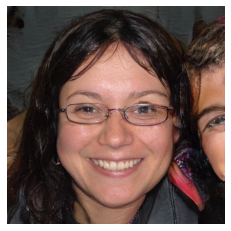

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')
im = Image.open("/content/stylegan/results/example.png")
im_list = np.asarray(im)
plt.imshow(im_list)

plt.show()